# RPM Tumor Time Series Analysis


In [5]:
import scvelo as scv
import scanpy as sc
import os.path as op
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import cellrank as cr
sys.path.insert(1, "/Users/smgroves/Documents/GitHub/Groves-CellSys2021/")
import mazebox as mb

In [6]:

scv.settings.verbosity = 3
scv.settings.set_figure_params("scvelo")
cr.settings.verbosity = 2

In [7]:
import warnings

warnings.simplefilter("ignore", category=UserWarning)
warnings.simplefilter("ignore", category=FutureWarning)
warnings.simplefilter("ignore", category=DeprecationWarning)

In [2]:
# !pip install phate

## Read in data

This data comes from the end of the notebook `RPM_tumors.ipynb`

In [9]:
adata = cr.read('../out/RPM-time-series/adata06.h5ad')

/var/folders/vh/xk34gq593k53lzm7wlyg64xw0000gn/T/ipykernel_71863/2177919680.py:1: DeprecationWarning: `cellrank.tl.read` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  adata = cr.read('../out/RPM-time-series/adata06.h5ad')


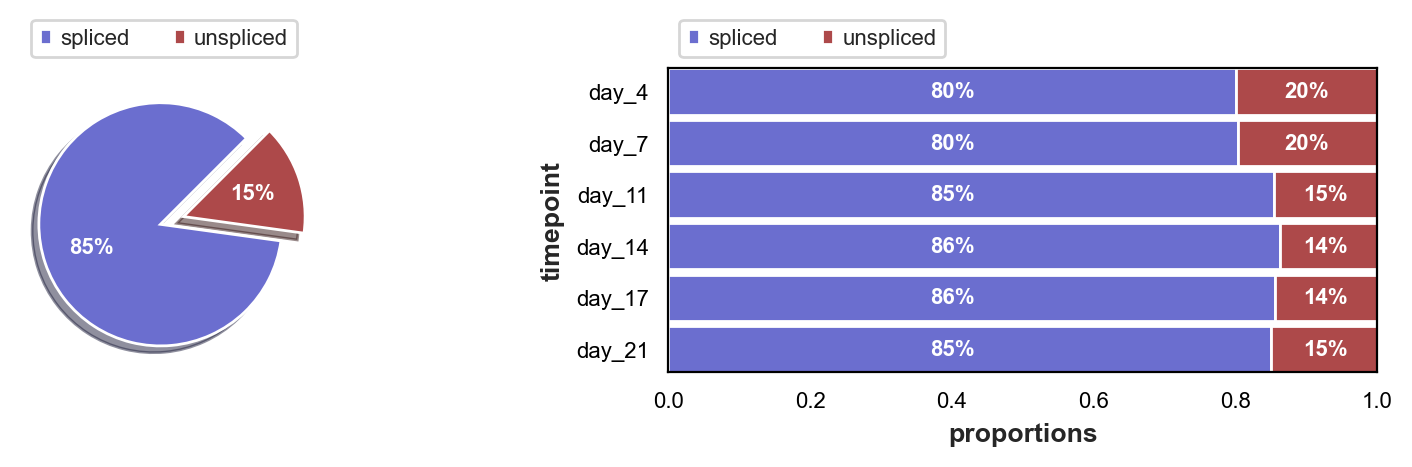

In [11]:
scv.pl.proportions(adata, groupby='timepoint')


## Run scVelo

In [12]:
scv.tl.recover_dynamics(adata, n_jobs=8)
scv.tl.velocity(adata, mode="dynamical", vkey = 'dynamical', groupby='timepoint')
scv.tl.velocity_graph(adata, vkey = 'dynamical')

recovering dynamics (using 8/16 cores)


  0%|          | 0/2710 [00:00<?, ?gene/s]

    finished (0:18:26) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:01:20) --> added 
    'dynamical', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/16 cores)


  0%|          | 0/15257 [00:00<?, ?cells/s]

    finished (0:01:26) --> added 
    'dynamical_graph', sparse matrix with cosine correlations (adata.uns)


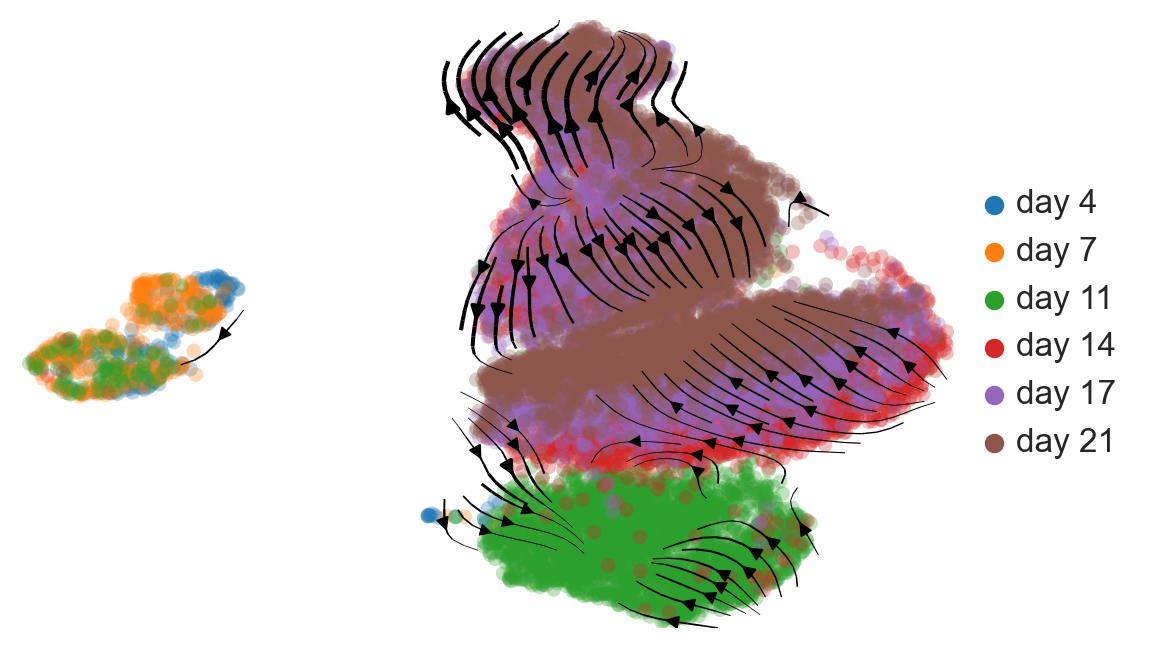

In [15]:
scv.pl.velocity_embedding_stream(
    adata, basis="umap", legend_fontsize=12, title="", smooth=0.8, min_mass=4, color='timepoint',legend_loc = 'on right',
)

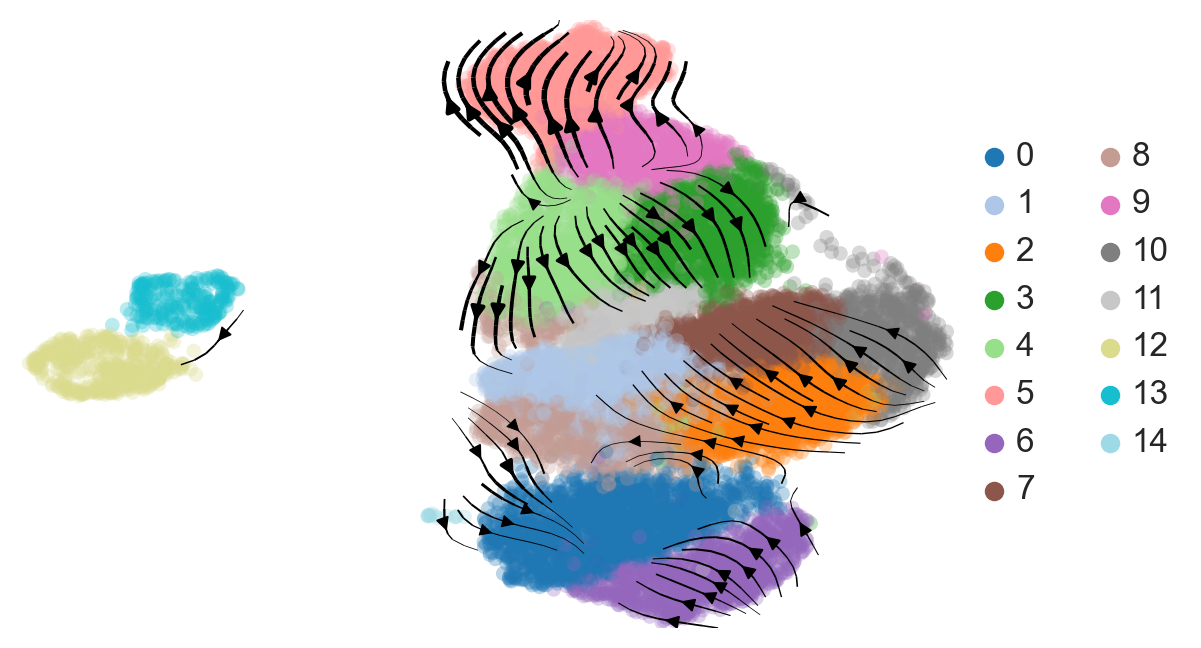

In [16]:
scv.pl.velocity_embedding_stream(
    adata, basis="umap", legend_fontsize=12, title="", smooth=0.8, min_mass=4, color='leiden',legend_loc = 'on right',
)

In [18]:
pd.crosstab(adata.obs.leiden, adata.obs.timepoint).style.background_gradient('viridis')

In [33]:
adata.var[adata.var.highly_variable == True]

Accession Chromosome        End      Start Strand  \
Gm42418  ENSMUSG00000098178         17   39848788   39846958      +   
Rplp0    ENSMUSG00000067274          5  115563727  115559467      +   
Ncl      ENSMUSG00000026234          1   86359400   86344719      -   
Malat1   ENSMUSG00000092341         19    5802672    5795690      -   
Mt1      ENSMUSG00000031765          8   94180327   94179082      +   
...                     ...        ...        ...        ...    ...   
Gm34354  ENSMUSG00000114854         13   59204327   59145873      +   
Myh8     ENSMUSG00000055775         11   67308634   67277124      +   
Klra1    ENSMUSG00000079853          6  130386874  130363917      -   
Gm36079  ENSMUSG00000095029         13  120027011  120026439      -   
Lcn10    ENSMUSG00000047356          2   25686081   25682726      +   

         dropkick_coef-day_11  dropkick_coef-day_14  dropkick_coef-day_17  \
Gm42418                   NaN                   NaN                   NaN   
Rplp0                     NaN                   NaN                   NaN   
Ncl                  0.007629              0.000000                   0.0   
Malat1               0.000000             -0.032096                   0.0   
Mt1                       NaN                   NaN                   NaN   
...                       ...                   ...                   ...   
Gm34354                   NaN                   NaN                   NaN   
Myh8                      NaN                   NaN                   NaN   
Klra1                     NaN                   NaN                   NaN   
Gm36079                   NaN                   NaN                   NaN   
Lcn10                     NaN                   NaN                   NaN   

         dropkick_coef-day_21  dropkick_coef-0-day_4  ...  fit_likelihood  \
Gm42418                   NaN                    NaN  ...             NaN   
Rplp0                     NaN                    NaN  ...             NaN   
Ncl                       0.0                    NaN  ...             NaN   
Malat1                    0.0                    NaN  ...        0.235232   
Mt1                       NaN                    NaN  ...             NaN   
...                       ...                    ...  ...             ...   
Gm34354                   NaN                    NaN  ...             NaN   
Myh8                      NaN                    NaN  ...             NaN   
Klra1                     NaN                    NaN  ...             NaN   
Gm36079                   NaN                    NaN  ...             NaN   
Lcn10                     NaN                    0.0  ...             NaN   

         fit_u0  fit_s0  fit_pval_steady  fit_steady_u  fit_steady_s  \
Gm42418     NaN     NaN              NaN           NaN           NaN   
Rplp0       NaN     NaN              NaN           NaN           NaN   
Ncl         NaN     NaN              NaN           NaN           NaN   
Malat1      0.0     0.0         0.499399     66.126056     93.335904   
Mt1         NaN     NaN              NaN           NaN           NaN   
...         ...     ...              ...           ...           ...   
Gm34354     NaN     NaN              NaN           NaN           NaN   
Myh8        NaN     NaN              NaN           NaN           NaN   
Klra1       NaN     NaN              NaN           NaN           NaN   
Gm36079     NaN     NaN              NaN           NaN           NaN   
Lcn10       NaN     NaN              NaN           NaN           NaN   

         fit_variance  fit_alignment_scaling    fit_r2  dynamical_genes  
Gm42418           NaN                    NaN  0.000000            False  
Rplp0             NaN                    NaN -0.023883            False  
Ncl               NaN                    NaN  0.003702            False  
Malat1       0.973164               2.508795  0.644139             True  
Mt1               NaN                    NaN  0.312969            False  
...   

In [34]:
adata.var[adata.var.velocity_genes == True]

Accession Chromosome        End      Start Strand  \
Malat1   ENSMUSG00000092341         19    5802672    5795690      -   
Bsg      ENSMUSG00000023175         10   79711969   79704491      +   
Rps3     ENSMUSG00000030744          7   99483738   99477896      -   
Cnbp     ENSMUSG00000030057          6   87851106   87842615      -   
Ctsl     ENSMUSG00000021477         13   64370890   64359337      -   
...                     ...        ...        ...        ...    ...   
Mybpc1   ENSMUSG00000020061         10   88605152   88518279      -   
Gm10639  ENSMUSG00000074179          9   78305525   78289923      +   
Gm33843  ENSMUSG00000112354         10   96595731   96519157      -   
Ptgdr    ENSMUSG00000071489         14   44859375   44851235      -   
Olfm3    ENSMUSG00000027965          3  115125722  114904078      +   

         dropkick_coef-day_11  dropkick_coef-day_14  dropkick_coef-day_17  \
Malat1               0.000000             -0.032096                   0.0   
Bsg                       NaN              0.135955                   NaN   
Rps3                      NaN                   NaN                   NaN   
Cnbp                      NaN                   NaN                   NaN   
Ctsl                 0.071778                   NaN                   NaN   
...                       ...                   ...                   ...   
Mybpc1                    NaN                   NaN                   NaN   
Gm10639                   NaN                   NaN                   NaN   
Gm33843                   NaN                   NaN                   NaN   
Ptgdr                     NaN                   NaN                   NaN   
Olfm3                     NaN                   NaN                   NaN   

         dropkick_coef-day_21  dropkick_coef-0-day_4  ...  fit_likelihood  \
Malat1                    0.0                    NaN  ...    2.352324e-01   
Bsg                       NaN                    NaN  ...    2.410296e-01   
Rps3                      NaN                    NaN  ...    2.199197e-01   
Cnbp                      NaN                    NaN  ...    2.684792e-01   
Ctsl                      NaN                    NaN  ...    2.454224e-01   
...                       ...                    ...  ...             ...   
Mybpc1                    NaN                    NaN  ...    5.585646e-07   
Gm10639                   NaN                    NaN  ...    1.045320e-05   
Gm33843                   NaN                    NaN  ...    2.928054e-03   
Ptgdr                     NaN                    NaN  ...    1.200078e-74   
Olfm3                     NaN                    NaN  ...    3.407897e-05   

         fit_u0  fit_s0  fit_pval_steady  fit_steady_u  fit_steady_s  \
Malat1      0.0     0.0     4.993992e-01     66.126056     93.335904   
Bsg         0.0     0.0     4.919127e-01      0.572684     20.336454   
Rps3        0.0     0.0     4.829878e-01     36.975822     20.704563   
Cnbp        0.0     0.0     4.863784e-01      0.550629     10.567585   
Ctsl        0.0     0.0     4.908991e-01      0.444378     10.532519   
...         ...     ...              ...           ...           ...   
Mybpc1      0.0     0.0     3.611681e-05      0.085046      0.038880   
Gm10639     0.0     0.0     5.116100e-07      0.011794      0.029730   
Gm33843     0.0     0.0     8.145814e-02      0.192273      0.046496   
Ptgdr       0.0     0.0     1.899168e-02      0.020160      0.150805   
Olfm3       0.0     0.0     2.744274e-03      0.116308      0.033153   

         fit_variance  fit_alignment_scaling    fit_r2  dynamical_genes  
Malat1       0.973164               2.508795  0.644139             True  
Bsg          0.943336               0.923404  0.463912            False  
Rps3         1.190962               8.976111  0.450335             True  
Cnbp         0.766829               2.516689  0.418399             True  
Ctsl         0.925719               0.961777  0.428889            False  
...   

In [42]:
adata.var[adata.var.dynamical_genes == True].sort_values('fit_likelihood', ascending=False)

Accession Chromosome        End      Start Strand  \
Shtn1    ENSMUSG00000041362         19   59076100   58973356      -   
Top2a    ENSMUSG00000020914         11   99024189   98992943      -   
Smc4     ENSMUSG00000034349          3   69034623   69004738      +   
Scg3     ENSMUSG00000032181          9   75684056   75643189      -   
Wnk2     ENSMUSG00000037989         13   49148014   49036303      -   
...                     ...        ...        ...        ...    ...   
Ephx2    ENSMUSG00000022040         14   66124500   66084374      -   
Gm21188  ENSMUSG00000095609         13  120052194  120034605      -   
Grem2    ENSMUSG00000050069          1  174921819  174833785      -   
Padi4    ENSMUSG00000025330          4  140774236  140745865      -   
Eci3     ENSMUSG00000021416         13   34963810   34946614      -   

         dropkick_coef-day_11  dropkick_coef-day_14  dropkick_coef-day_17  \
Shtn1                     NaN                   NaN                   NaN   
Top2a                0.048272              0.001116                   NaN   
Smc4                      NaN                   NaN                   NaN   
Scg3                      NaN                   NaN                   NaN   
Wnk2                      NaN                   NaN                   NaN   
...                       ...                   ...                   ...   
Ephx2                     NaN                   NaN                   NaN   
Gm21188              0.000000                   NaN                   NaN   
Grem2                     NaN                   NaN                   NaN   
Padi4                     NaN                   NaN                   NaN   
Eci3                      NaN                   NaN                   NaN   

         dropkick_coef-day_21  dropkick_coef-0-day_4  ...  fit_likelihood  \
Shtn1                     NaN                    NaN  ...        0.494050   
Top2a                     NaN                    NaN  ...        0.493185   
Smc4                      NaN                    NaN  ...        0.483459   
Scg3                      NaN                    NaN  ...        0.477745   
Wnk2                      NaN                    NaN  ...        0.457145   
...                       ...                    ...  ...             ...   
Ephx2                     NaN                    NaN  ...        0.001072   
Gm21188                   NaN                    NaN  ...        0.001057   
Grem2                     NaN                    NaN  ...        0.001047   
Padi4                     NaN                    NaN  ...        0.001043   
Eci3                      NaN                    NaN  ...        0.001042   

         fit_u0  fit_s0  fit_pval_steady  fit_steady_u  fit_steady_s  \
Shtn1       0.0     0.0     4.238431e-01      0.815465      0.925155   
Top2a       0.0     0.0     4.903897e-01      1.976545      9.775499   
Smc4        0.0     0.0     4.822863e-01      1.530441      6.815564   
Scg3        0.0     0.0     4.462725e-01      0.327456      2.368066   
Wnk2        0.0     0.0     4.142872e-01      1.365288      0.788902   
...         ...     ...              ...           ...           ...   
Ephx2       0.0     0.0     1.109537e-17      0.028795      0.034489   
Gm21188     0.0     0.0     7.798676e-02      0.077668      0.111614   
Grem2       0.0     0.0     4.772853e-01      0.154151      0.272249   
Padi4       0.0     0.0     4.556023e-05      0.025954      0.034864   
Eci3        0.0     0.0     2.225919e-01      0.012608      0.085056   

         fit_variance  fit_alignment_scaling    fit_r2  dynamical_genes  
Shtn1        0.146026               3.189410  0.938024             True  
Top2a        0.210605               1.498621  0.620661             True  
Smc4         0.246965               2.359758  0.636155             True  
Scg3         0.168714               3.813083  0.913611             True  
Wnk2         0.146865               4.591818  0.913566             True  
...   

In [46]:
var_names = ['Myc', 'Notch1', 'Notch2','Ascl1','Mycl']
scv.tl.differential_kinetic_test(adata, var_names=var_names, groupby='timepoint')

recovering dynamics (using 1/16 cores)
    finished (0:00:08) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)

outputs model fit of gene: Mycl
testing for differential kinetics
    finished (0:00:01) --> added 
    'fit_diff_kinetics', clusters displaying differential kinetics (adata.var)
    'fit_pvals_kinetics', p-values of differential kinetics (adata.var)


In [50]:
adata.var.loc[var_names, ['fit_diff_kinetics', 'fit_pval_kinetics']]


fit_diff_kinetics  fit_pval_kinetics
Myc                                     NaN
Notch1                                  NaN
Notch2                                  NaN
Ascl1                                   NaN
Mycl                                    NaN

computing latent time using root_cells as prior
    finished (0:00:22) --> added 
    'latent_time', shared time (adata.obs)


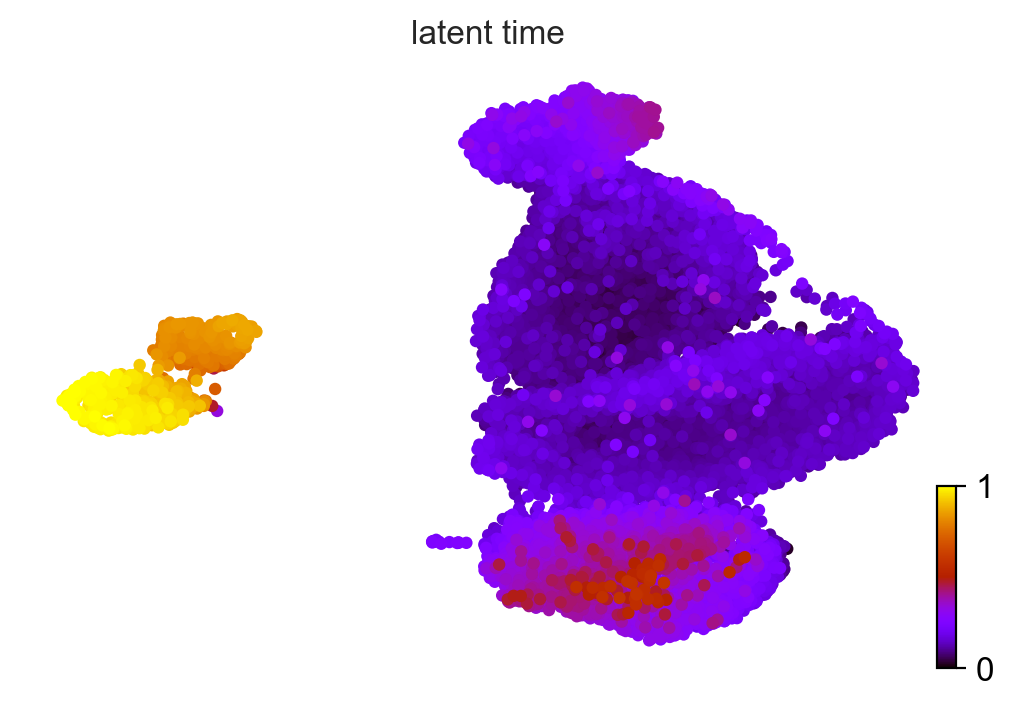

In [51]:
scv.tl.latent_time(adata)
scv.pl.scatter(adata, color='latent_time', color_map='gnuplot', size=80)


In [52]:
scv.tl.rank_dynamical_genes(adata, groupby='timepoint')
df = scv.get_df(adata, 'rank_dynamical_genes/names')
df.head(5)

ranking genes by cluster-specific likelihoods
    finished (0:00:42) --> added 
    'rank_dynamical_genes', sorted scores by group ids (adata.uns)


day_4   day_7 day_11  day_14  day_17    day_21
0   Cadps2  Cadps2  Top2a  Mrpl20   Top2a     Top2a
1     Pclo    Scg3  Anxa3    Smc4    Smc4      Smc4
2    Shtn1   Epcam   Smc4    Lhfp   Hells  Mis18bp1
3    Bspry  Elavl3  Esco2   Top2a  Specc1      Idh2
4  Aldh1a7  Nipal2  Cdca2   Ltbp1    Lhfp     Cdca2

In [53]:
sc.tl.diffmap(adata)


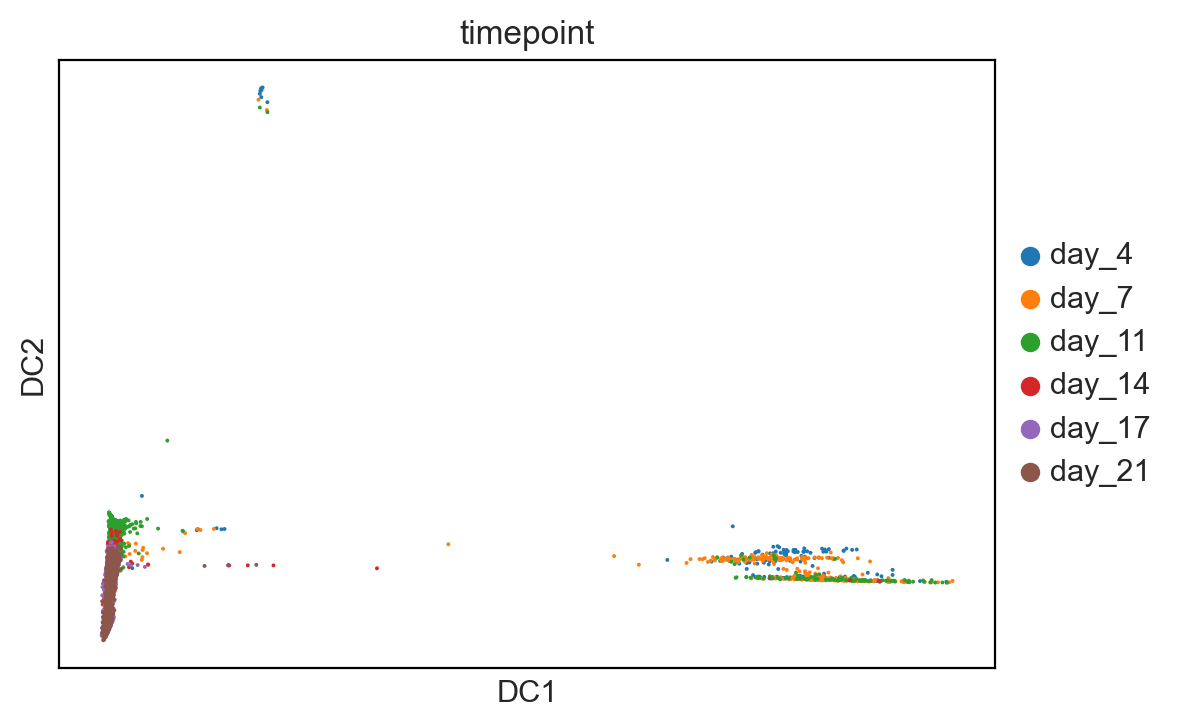

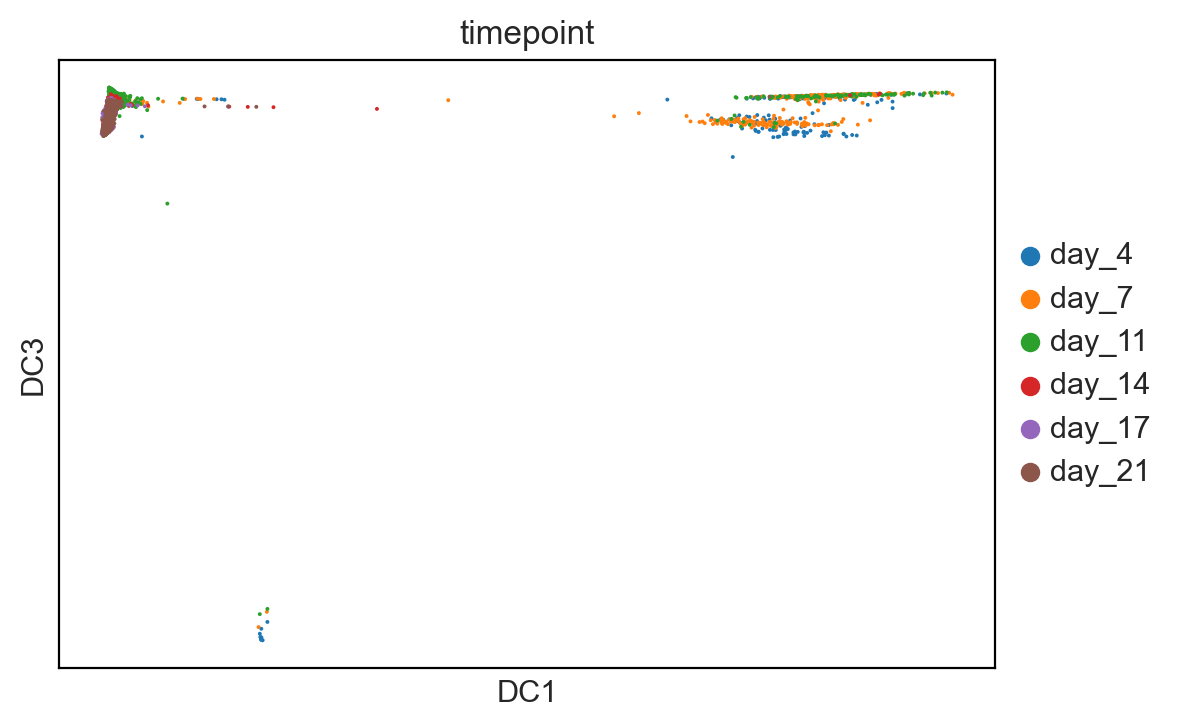

In [54]:
sc.pl.diffmap(adata, components='1,2', color='timepoint')
sc.pl.diffmap(adata, components='1,3', color='timepoint')


In [ ]:
#Find the stem cell with the highest DC1 value to act as root for the diffusion pseudotime and compute DPT
stem_mask = np.isin(adata.obs['timepoint'], 'day_4')
min_stem_id = np.argmin(adata.obsm['X_diffmap'][stem_mask,1])
root_id = np.arange(len(stem_mask))[stem_mask][min_stem_id]
adata.uns['iroot'] = root_id

In [ ]:
sc.tl.dpt(adata)
sc.pl.diffmap(adata, color=['dpt_pseudotime', 'timepoint'])


# Run CellRank

## Find initial and terminal states.

I think it may be helpful here to:

1. Louvain/leiden cluster the samples.
2. Connect each cluster with each of our archetype signatures.
    1. Otherwise, our archetype signatures are not finding clusters in umap space 
3. Find end states in terms of the clusters, and then connect that with the archetypes through signatures.


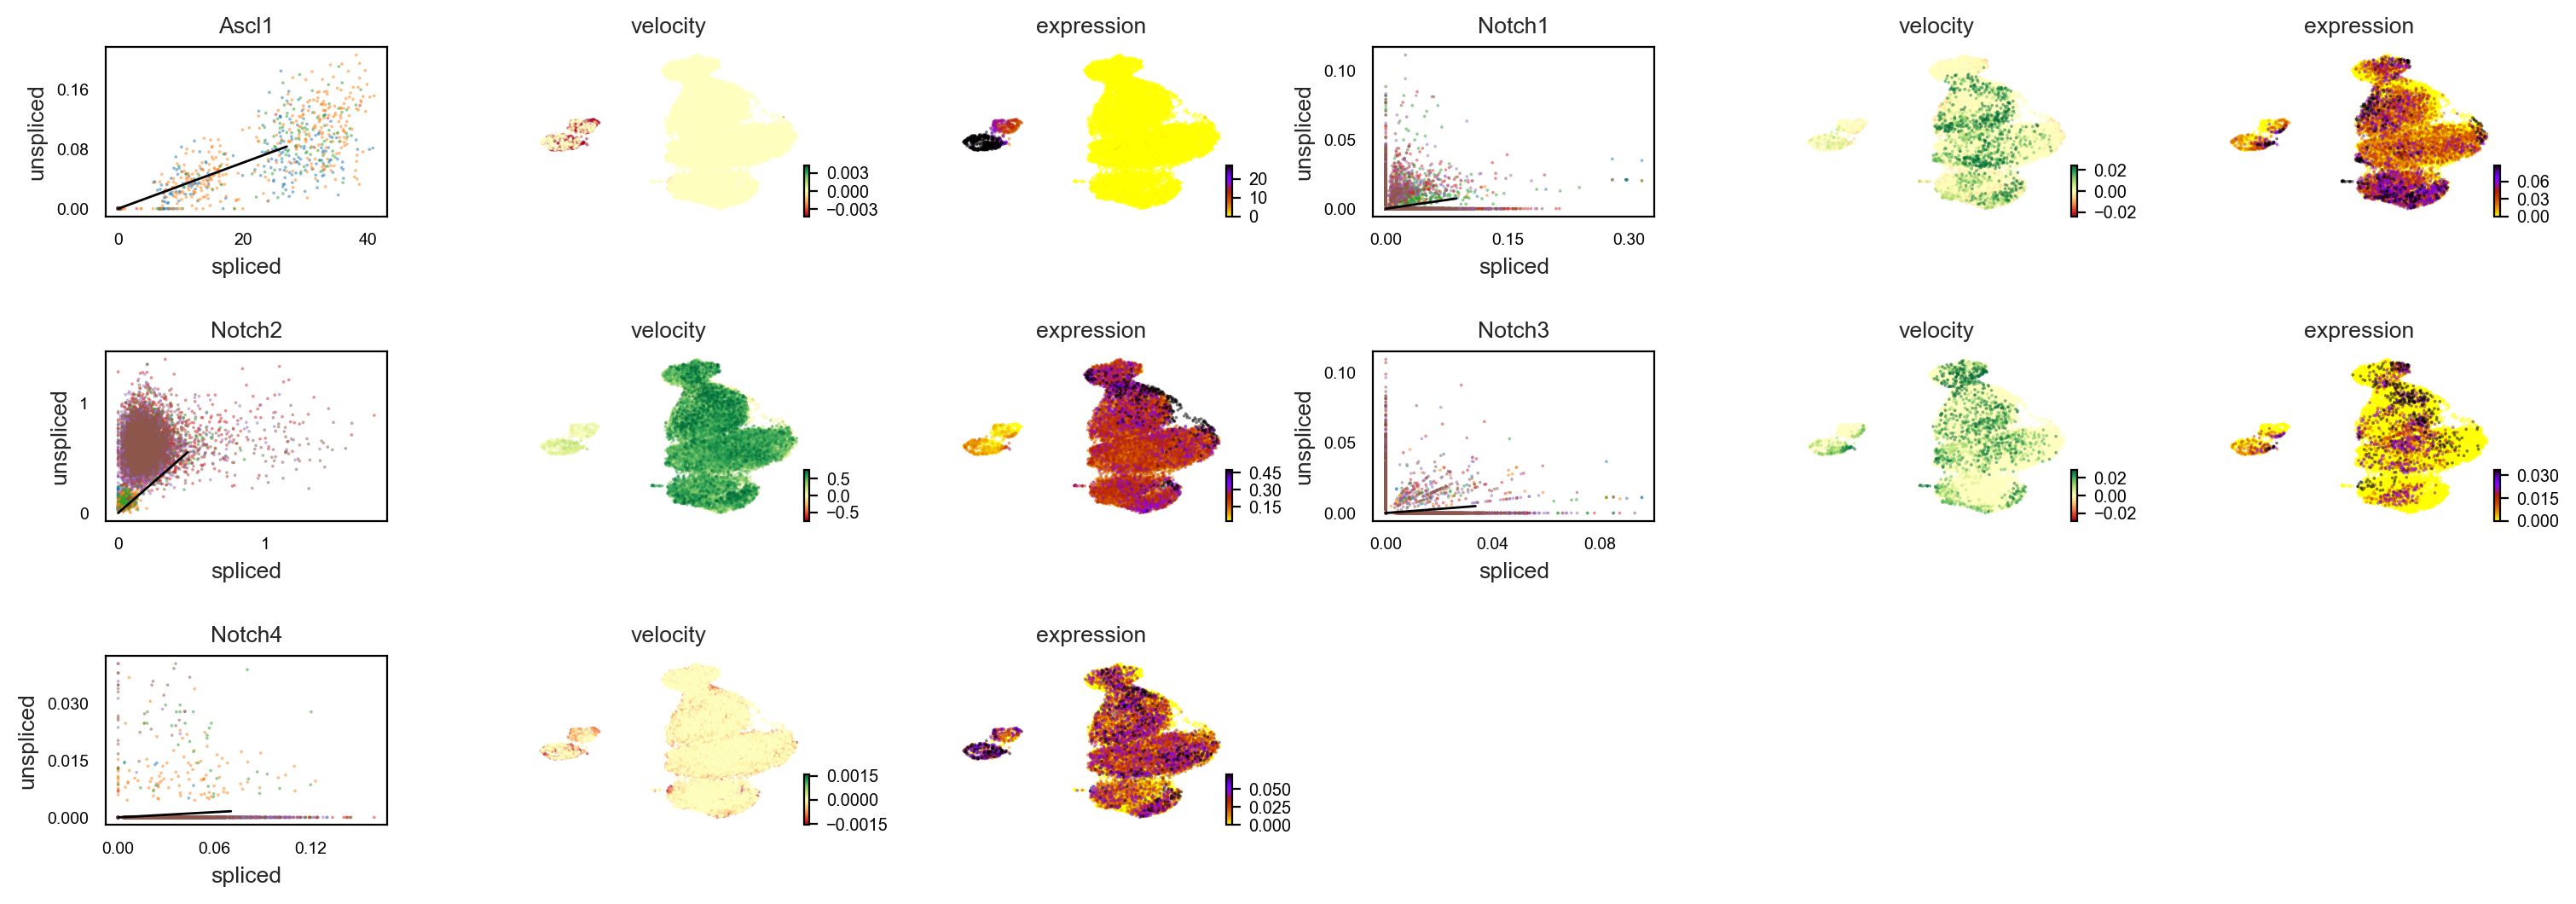

In [37]:
scv.pl.velocity(adata, ['Ascl1',  'Notch1', 'Notch2', 'Notch3','Notch4'], ncols=2, color='timepoint')


In [38]:
scv.tl.recover_dynamics(adata, var_names=['Ascl1',  'Notch1', 'Notch2', 'Notch3','Notch4'])

# top_genes = adata.var['fit_likelihood'].sort_values(ascending=False).index

# scv.pl.scatter(adata, basis=top_genes[:15], ncols=5, frameon=False)


recovering dynamics (using 1/16 cores)
    finished (0:00:12) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


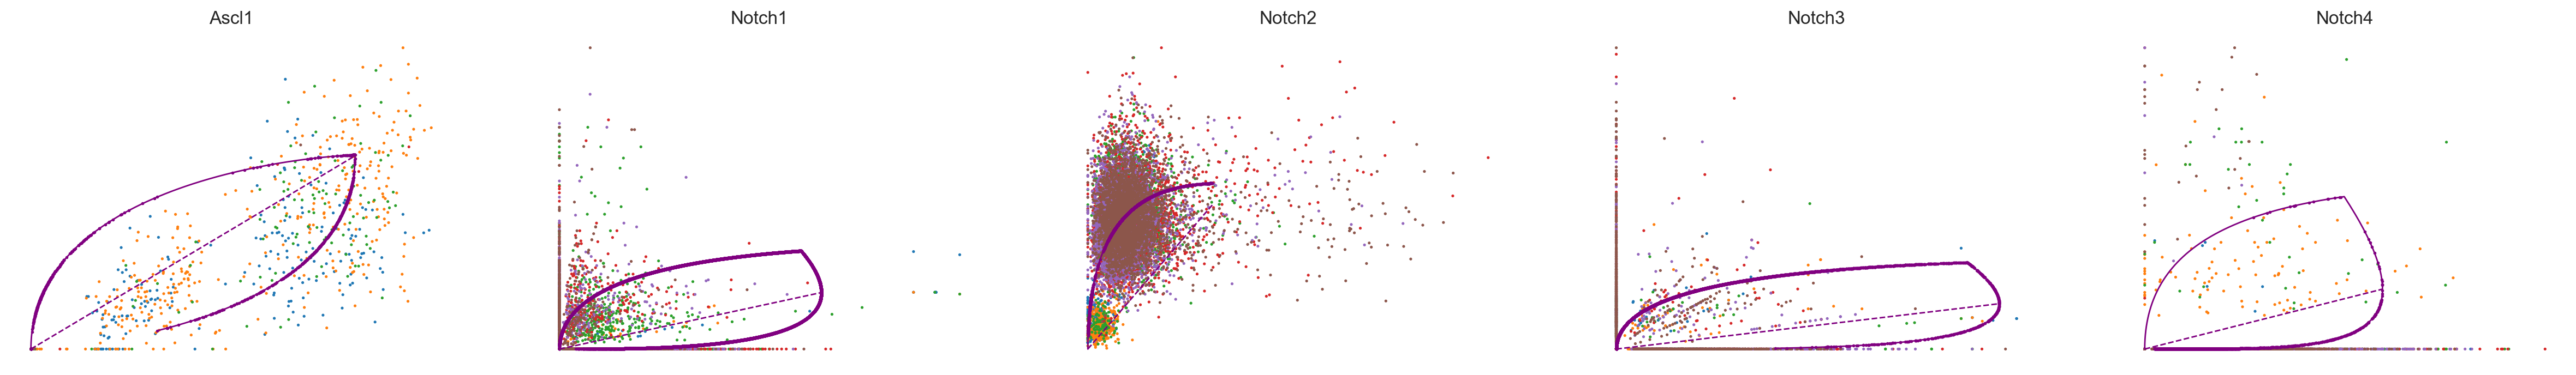

In [39]:
scv.pl.scatter(adata, basis=['Ascl1',  'Notch1', 'Notch2', 'Notch3','Notch4'], ncols=5, frameon=False, color = 'timepoint')


In [13]:
var_names = ['Ascl1',  'Notch1', 'Notch2', 'Notch3','Notch4']
scv.tl.differential_kinetic_test(adata, var_names=var_names, groupby='timepoint')


testing for differential kinetics
    finished (0:00:02) --> added 
    'fit_diff_kinetics', clusters displaying differential kinetics (adata.var)
    'fit_pvals_kinetics', p-values of differential kinetics (adata.var)


In [41]:
adata.var.loc[['Ascl1',  'Notch1', 'Notch2', 'Notch3','Notch4']]

Accession Chromosome       End     Start Strand  \
Ascl1   ENSMUSG00000020052         10  87493660  87490819      -   
Notch1  ENSMUSG00000026923          2  26516663  26457903      -   
Notch2  ENSMUSG00000027878          3  98150361  98013527      +   
Notch3  ENSMUSG00000038146         17  32166852  32120820      -   
Notch4  ENSMUSG00000015468         17  34588503  34564268      +   

        dropkick_coef-day_11  dropkick_coef-day_14  dropkick_coef-day_17  \
Ascl1               0.000000                   0.0                   0.0   
Notch1                   NaN                   NaN                   NaN   
Notch2             -0.018835                   NaN                   NaN   
Notch3                   NaN                   0.0                   NaN   
Notch4                   NaN                   NaN                   NaN   

        dropkick_coef-day_21  dropkick_coef-0-day_4  ...  fit_likelihood  \
Ascl1                    0.0               0.000000  ...        0.249033   
Notch1                   NaN                    NaN  ...        0.016793   
Notch2                   NaN              -0.019241  ...        0.198004   
Notch3                   NaN               0.000000  ...        0.000032   
Notch4                   0.0               0.000000  ...        0.000051   

        fit_u0  fit_s0  fit_pval_steady  fit_steady_u  fit_steady_s  \
Ascl1      0.0     0.0         0.495193      0.106626     31.646573   
Notch1     0.0     0.0         0.458397      0.040862      0.279057   
Notch2     0.0     0.0         0.446140      0.630897      0.393217   
Notch3     0.0     0.0         0.104226      0.036794      0.049316   
Notch4     0.0     0.0         0.003051      0.024075      0.070014   

        fit_variance  fit_alignment_scaling    fit_r2  dynamical_genes  
Ascl1       0.320864               0.156963  0.849694            False  
Notch1      3.778659               1.412052 -0.030025            False  
Notch2      0.848514               5.297847 -3.165879            False  
Notch3      1.242071               2.630481 -0.062951            False  
Notch4      1.326354               1.152647  0.005309            False  

[5 rows x 45 columns]